## Putting it all together

In [1]:
import seaborn as sns; sns.set_style("dark")
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler, Normalizer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import janitor
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNetCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
import janitor

In [2]:
data = pd.read_csv("data/bankchurnersuse.csv").clean_names()

In [3]:
data

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
train, test = train_test_split(data, random_state = 10, train_size = 0.8, stratify = data["attrition_flag"])

In [5]:
train, test_init = train_test_split(train, random_state = 10, train_size = 0.8, stratify = train["attrition_flag"])

In [6]:
train.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
2147,770882508,Existing Customer,38,M,2,College,Married,$80K - $120K,Blue,24,...,1,5,17162.0,773,16389.0,1.238,2457,54,1.000,0.045
7967,712200033,Existing Customer,44,F,4,High School,Single,Less than $40K,Blue,36,...,3,3,3024.0,0,3024.0,0.750,4983,78,0.733,0.000
9892,806917983,Existing Customer,32,F,2,Graduate,Divorced,Unknown,Silver,27,...,3,1,33779.0,1526,32253.0,0.879,15200,126,0.800,0.045
7983,715463133,Existing Customer,40,M,5,High School,Single,$120K +,Blue,31,...,1,3,34516.0,1427,33089.0,0.706,3699,64,0.488,0.041
5638,711824358,Existing Customer,44,F,4,College,Single,Less than $40K,Blue,31,...,3,2,3228.0,0,3228.0,0.747,4524,70,0.667,0.000


In [7]:
test.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
3933,815240358,Existing Customer,47,F,3,Uneducated,Married,Unknown,Blue,42,...,1,4,25027.0,1501,23526.0,1.063,3357,62,0.771,0.060
2790,779284833,Existing Customer,55,M,2,Post-Graduate,Single,$60K - $80K,Blue,37,...,3,1,22127.0,1799,20328.0,0.758,3591,63,0.750,0.081
8663,719658858,Existing Customer,50,F,4,Doctorate,Married,Unknown,Silver,36,...,2,1,34516.0,2096,32420.0,0.666,7042,73,0.553,0.061
731,719459358,Existing Customer,52,M,1,Doctorate,Married,$120K +,Blue,41,...,2,2,33864.0,989,32875.0,1.219,1751,48,0.920,0.029
3335,734924658,Existing Customer,47,F,5,High School,Married,Less than $40K,Blue,36,...,3,1,1478.0,792,686.0,0.873,4123,67,0.489,0.536


### Hardcoded Feature Engineering

In [8]:
train["revolving_trans"] = train["total_revolving_bal"]/train["total_trans_amt"]
test_init["revolving_trans"] = test_init["total_revolving_bal"]/test_init["total_trans_amt"]
test["revolving_trans"] = test["total_revolving_bal"]/test["total_trans_amt"]

In [9]:
train["marriage_education"] = train["marital_status"] + "_" + train["education_level"]
test_init["marriage_education"] = test_init["marital_status"] + "_" + test_init["education_level"]
test["marriage_education"] = test["marital_status"] + "_" + test["education_level"]

In [10]:
train["attrition_flag"] = train["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)
test["attrition_flag"] = test["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)
test_init["attrition_flag"] = test_init["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)

### Data deduplication

In [11]:
train_0 = train[train["attrition_flag"] == 0]
train_0.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
2147,770882508,0,38,M,2,College,Married,$80K - $120K,Blue,24,...,17162.0,773,16389.0,1.238,2457,54,1.000,0.045,0.314611,Married_College
7967,712200033,0,44,F,4,High School,Single,Less than $40K,Blue,36,...,3024.0,0,3024.0,0.750,4983,78,0.733,0.000,0.000000,Single_High School
9892,806917983,0,32,F,2,Graduate,Divorced,Unknown,Silver,27,...,33779.0,1526,32253.0,0.879,15200,126,0.800,0.045,0.100395,Divorced_Graduate
7983,715463133,0,40,M,5,High School,Single,$120K +,Blue,31,...,34516.0,1427,33089.0,0.706,3699,64,0.488,0.041,0.385780,Single_High School
5638,711824358,0,44,F,4,College,Single,Less than $40K,Blue,31,...,3228.0,0,3228.0,0.747,4524,70,0.667,0.000,0.000000,Single_College


In [12]:
train_1 = train[train["attrition_flag"] == 1]
train_1.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
5562,787665258,1,47,F,3,Unknown,Married,Less than $40K,Blue,37,...,1438.3,0,1438.3,0.749,2393,36,0.636,0.0,0.0,Married_Unknown
6731,711122958,1,41,F,3,Graduate,Single,Less than $40K,Blue,33,...,1764.0,0,1764.0,0.552,2105,57,0.839,0.0,0.0,Single_Graduate
2174,712551258,1,39,M,1,Uneducated,Married,Less than $40K,Blue,36,...,4247.0,0,4247.0,0.405,847,17,0.133,0.0,0.0,Married_Uneducated
7973,820694133,1,60,F,0,High School,Married,Unknown,Blue,55,...,5549.0,0,5549.0,0.703,2412,38,0.520,0.0,0.0,Married_High School
2284,710586483,1,26,F,0,High School,Single,Unknown,Blue,13,...,6152.0,0,6152.0,0.391,968,23,0.533,0.0,0.0,Single_High School


In [13]:
train_0 = train_0.drop_duplicates()

### Class balancing

In [14]:
rand_list = list(np.random.randint(0, len(train_0), len(train_1)))

In [15]:
train_0 = train_0.iloc[rand_list,]
train_0.shape

(1041, 23)

In [16]:
train_new = pd.concat([train_0, train_1], axis = 0)
train_new.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
2555,719978583,0,46,M,2,High School,Married,$60K - $80K,Blue,40,...,5265.0,0,5265.0,0.524,3281,68,0.744,0.000,0.000000,Married_High School
1997,748503708,0,54,F,1,High School,Single,Less than $40K,Blue,47,...,2797.0,1627,1170.0,0.413,1566,36,0.714,0.582,1.038953,Single_High School
2634,797638383,0,49,F,4,High School,Married,Less than $40K,Blue,43,...,4852.0,2016,2836.0,0.576,3561,73,0.622,0.415,0.566133,Married_High School
1551,716253858,0,37,M,5,Post-Graduate,Married,$80K - $120K,Blue,26,...,16730.0,1956,14774.0,0.675,1740,43,0.536,0.117,1.124138,Married_Post-Graduate
2179,771976683,0,54,F,1,College,Married,Unknown,Blue,43,...,5839.0,2130,3709.0,0.687,1640,44,0.333,0.365,1.298780,Married_College


### Splitting into independent and dependent variables

In [17]:
x_train, y_train = train_new.drop(['attrition_flag','gender','clientnum'], axis = 1), train_new["attrition_flag"]

In [18]:
x_test, y_test = test.drop(['attrition_flag','gender','clientnum'], axis = 1), test["attrition_flag"]

In [19]:
x_test_init, y_test_init = test_init.drop(['attrition_flag','gender','clientnum'], axis = 1), test_init["attrition_flag"]

### Gathering categorical and numerical columns

In [20]:
num = []
cat = []
columns = list(x_train.columns)
for col in columns:
    if is_numeric_dtype(x_train[col]):
        num.append(col)
    elif is_string_dtype(x_train[col]):
        cat.append(col)

In [21]:
num

['customer_age',
 'dependent_count',
 'months_on_book',
 'total_relationship_count',
 'months_inactive_12_mon',
 'contacts_count_12_mon',
 'credit_limit',
 'total_revolving_bal',
 'avg_open_to_buy',
 'total_amt_chng_q4_q1',
 'total_trans_amt',
 'total_trans_ct',
 'total_ct_chng_q4_q1',
 'avg_utilization_ratio',
 'revolving_trans']

### Preprocessing tools

In [22]:
one_hot = OneHotEncoder()
min_max = MinMaxScaler()
sd = StandardScaler()
le = LabelEncoder()

In [23]:
ct = ColumnTransformer([("one_hot", one_hot, cat), ("min_max", min_max, num)])

### Pipeline Creation

In [24]:
xgb = XGBClassifier()
dc = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [25]:
vot = VotingClassifier(estimators = [('xgb', xgb), ('rf', rf), ('dc', dc)], voting = 'soft')

In [26]:
pipeline = Pipeline([("ct", ct), ("vot", vot)])

### Cross Validation via pipeline

In [27]:
cross_val_score(pipeline, x_train, y_train, cv = 5, scoring = "precision")

array([0.93023256, 0.9342723 , 0.95145631, 0.94660194, 0.94711538])

### Fitting pipeline on training data

In [28]:
model = pipeline.fit(x_train, y_train)

### Evaluating pipeline's accuracy

#### Training data results

In [29]:
pred_train = model.predict(x_train)
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       1.00      1.00      1.00      1041

    accuracy                           1.00      2082
   macro avg       1.00      1.00      1.00      2082
weighted avg       1.00      1.00      1.00      2082



<AxesSubplot:>

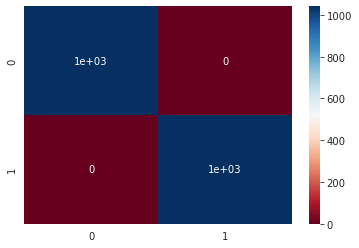

In [30]:
conf = confusion_matrix(y_train, pred_train)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [31]:
train_new["prediction"] = pred_train
train_probs = model.predict_proba(x_train)
train_new["prob_0"], train_new["prob_1"] = train_probs[:,0], train_probs[:,1]
train_new.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education,prediction,prob_0,prob_1
2555,719978583,0,46,M,2,High School,Married,$60K - $80K,Blue,40,...,0.524,3281,68,0.744,0.000,0.000000,Married_High School,0,0.996536,0.003464
1997,748503708,0,54,F,1,High School,Single,Less than $40K,Blue,47,...,0.413,1566,36,0.714,0.582,1.038953,Single_High School,0,0.950610,0.049390
2634,797638383,0,49,F,4,High School,Married,Less than $40K,Blue,43,...,0.576,3561,73,0.622,0.415,0.566133,Married_High School,0,0.996661,0.003339
1551,716253858,0,37,M,5,Post-Graduate,Married,$80K - $120K,Blue,26,...,0.675,1740,43,0.536,0.117,1.124138,Married_Post-Graduate,0,0.982613,0.017387
2179,771976683,0,54,F,1,College,Married,Unknown,Blue,43,...,0.687,1640,44,0.333,0.365,1.298780,Married_College,0,0.975955,0.024045


#### Initial test data results

In [32]:
pred_test_init = model.predict(x_test_init)
print(classification_report(y_test_init, pred_test_init))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1360
           1       0.66      0.94      0.77       261

    accuracy                           0.91      1621
   macro avg       0.82      0.92      0.86      1621
weighted avg       0.93      0.91      0.92      1621



<AxesSubplot:>

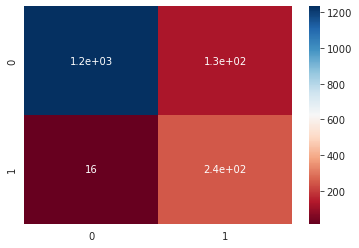

In [33]:
conf = confusion_matrix(y_test_init, pred_test_init)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [34]:
test_init["prediction"] = pred_test_init
test_init_probs = model.predict_proba(x_test_init)
test_init["prob_0"], test_init["prob_1"] = test_init_probs[:,0], test_init_probs[:,1]
test_init.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education,prediction,prob_0,prob_1
2447,712040433,0,54,F,1,High School,Married,Less than $40K,Blue,43,...,0.697,2097,57,0.541,0.954,1.049118,Married_High School,0,0.657765,0.342235
2052,765824058,0,46,M,4,Doctorate,Married,$80K - $120K,Blue,39,...,0.907,3784,74,0.609,0.301,0.406712,Married_Doctorate,0,0.963212,0.036788
7923,718548558,0,53,F,3,Unknown,Single,Less than $40K,Blue,42,...,0.927,4272,70,0.750,0.700,0.477762,Single_Unknown,0,0.979974,0.020026
2293,710567508,0,53,M,3,High School,Married,$80K - $120K,Blue,44,...,0.571,1387,33,0.650,0.094,1.587599,Married_High School,0,0.945687,0.054313
4750,715776033,0,46,M,5,Uneducated,Single,$60K - $80K,Blue,33,...,0.572,4116,68,0.700,0.000,0.000000,Single_Uneducated,0,0.969993,0.030007


In [35]:
pred_init_score = test_init["prob_1"]

#### Precision - Recall Curve

In [36]:
precisions, recalls, thresholds = precision_recall_curve(y_test_init, pred_init_score)

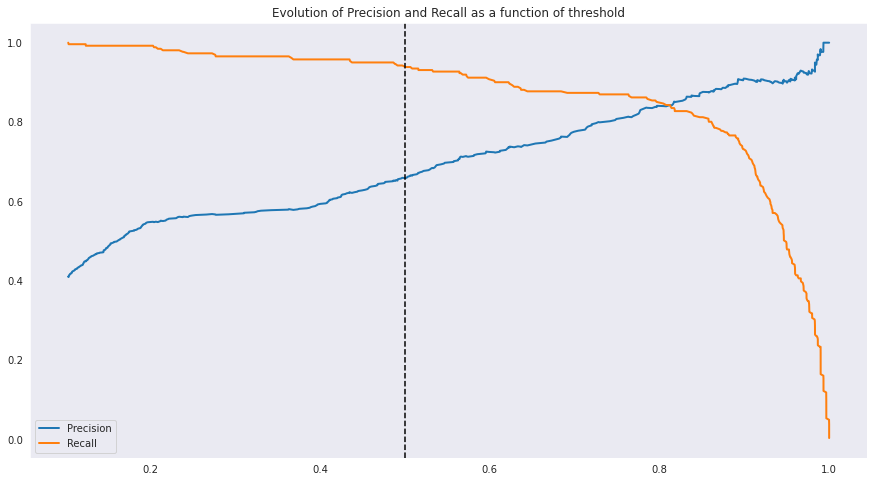

In [37]:
plt.figure(figsize = (15,8))
sns.lineplot(x = thresholds, y = precisions[:-1], markers = "b--", label="Precision", linewidth=2)
sns.lineplot(x = thresholds, y = recalls[:-1], markers = "g-", label="Recall", linewidth=2)
plt.axvline(x = [0.5], color = "black", linestyle = "dashed")
plt.title("Evolution of Precision and Recall as a function of threshold")
plt.show()

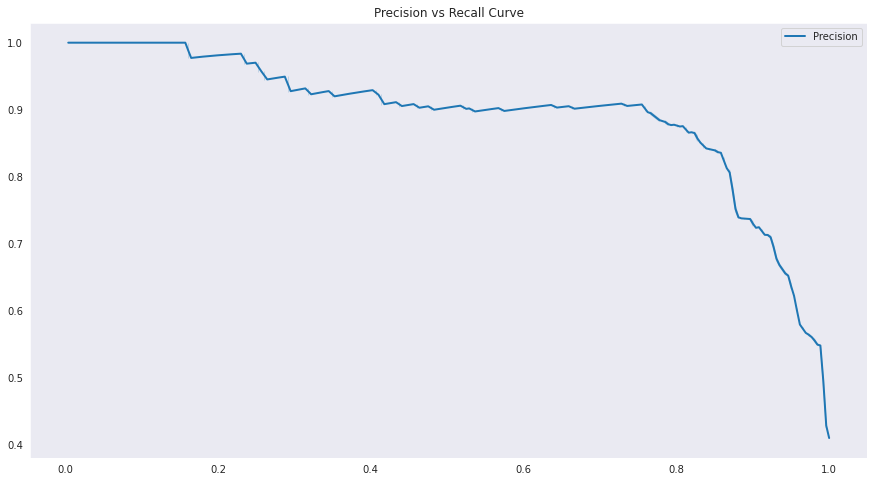

In [38]:
plt.figure(figsize = (15,8))
sns.lineplot(x = recalls[:-1], y = precisions[:-1], markers = "b--", label="Precision", linewidth=2)
plt.title("Precision vs Recall Curve")
#plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
[...]  # beautify the figure: add grid, legend, axis, labels, and circles
plt.show();

#### ROC Curve/ROC AUC Score

In [39]:
roc_auc_score(y_test_init, pred_init_score)

0.9787187288708588

In [40]:
fpr, tpr, thresholds = roc_curve(y_test_init, pred_init_score)

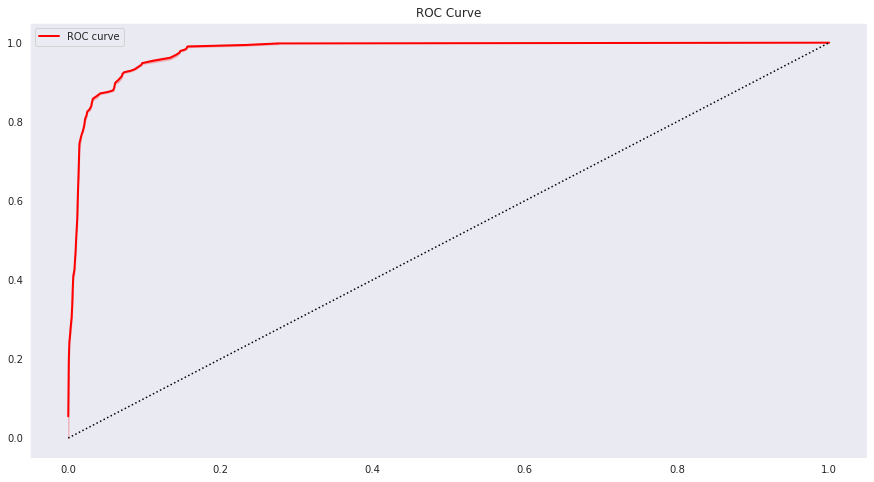

In [41]:
plt.figure(figsize = (15,8))
sns.lineplot(x = fpr, y = tpr, linewidth=2, label="ROC curve", color = "red")
plt.plot([0, 1], [0, 1], 'k:')
plt.title("ROC Curve")
plt.show()

#### RF Feature Importance

In [42]:
vip = pipeline.steps[1][1].estimators_[1].feature_importances_
vip

array([1.84197992e-03, 1.08310592e-03, 3.08627799e-03, 3.60098247e-03,
       1.67948018e-03, 2.76757592e-03, 2.26834006e-03, 1.68286658e-03,
       4.66288398e-03, 3.85026175e-03, 1.56669313e-03, 2.14544908e-03,
       3.19926720e-03, 3.82473371e-03, 4.46189661e-03, 4.03277825e-03,
       3.24724772e-03, 1.97783575e-03, 2.19505051e-03, 2.25912504e-04,
       1.93076778e-03, 5.15407571e-04, 1.81842125e-04, 9.09329520e-04,
       9.61437009e-04, 3.03514259e-04, 1.03584319e-03, 2.92934786e-04,
       1.75972903e-03, 9.87275566e-04, 2.96327372e-03, 2.48044311e-03,
       9.64211359e-04, 2.31107443e-03, 1.92413812e-03, 1.24498740e-03,
       5.15766523e-04, 2.14226635e-03, 1.68243263e-03, 9.20663997e-04,
       1.23100062e-03, 1.52974087e-03, 5.08806012e-04, 8.69952767e-05,
       1.21265883e-03, 6.40488660e-04, 4.40227936e-04, 7.63565107e-04,
       5.17862211e-04, 2.79203230e-02, 1.19286951e-02, 2.59162232e-02,
       3.35362853e-02, 3.12961106e-02, 2.48149722e-02, 3.07632042e-02,
      

In [43]:
pipeline.steps[0][1].transformers_[0][1].get_feature_names()

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_College', 'x0_Doctorate', 'x0_Graduate', 'x0_High School',
       'x0_Post-Graduate', 'x0_Uneducated', 'x0_Unknown', 'x1_Divorced',
       'x1_Married', 'x1_Single', 'x1_Unknown', 'x2_$120K +',
       'x2_$40K - $60K', 'x2_$60K - $80K', 'x2_$80K - $120K',
       'x2_Less than $40K', 'x2_Unknown', 'x3_Blue', 'x3_Gold',
       'x3_Platinum', 'x3_Silver', 'x4_Divorced_College',
       'x4_Divorced_Doctorate', 'x4_Divorced_Graduate',
       'x4_Divorced_High School', 'x4_Divorced_Post-Graduate',
       'x4_Divorced_Uneducated', 'x4_Divorced_Unknown',
       'x4_Married_College', 'x4_Married_Doctorate',
       'x4_Married_Graduate', 'x4_Married_High School',
       'x4_Married_Post-Graduate', 'x4_Married_Uneducated',
       'x4_Married_Unknown', 'x4_Single_College', 'x4_Single_Doctorate',
       'x4_Single_Graduate', 'x4_Single_High School',
       'x4_Single_Post-Graduate', 'x4_Single_Uneducated',
       'x4_Single_Unknown', 'x4_Unknown_College', 'x4_Unknown_Doctorate',
       '

In [44]:
#create df with vip info
rf_feature_importances_info = pd.DataFrame({'feat_names':list(pipeline.steps[0][1].transformers_[0][1].get_feature_names()) + num, 'vip': vip})

#get sign and magnitude information
rf_feature_importances_info = rf_feature_importances_info.assign(feature_importances_mag = abs(rf_feature_importances_info['vip']),
                             feature_importances_sign = np.sign(rf_feature_importances_info['vip']))
rf_feature_importances_info = rf_feature_importances_info.set_index('feat_names').sort_values(by='feature_importances_mag', ascending=False)
rf_feature_importances_info.head(10)

,vip,feature_importances_mag,feature_importances_sign
feat_names,,,
total_trans_ct,0.173854,0.173854,1.0
total_trans_amt,0.154209,0.154209,1.0
total_ct_chng_q4_q1,0.097009,0.097009,1.0
total_revolving_bal,0.091365,0.091365,1.0
revolving_trans,0.066676,0.066676,1.0
total_amt_chng_q4_q1,0.058957,0.058957,1.0
avg_utilization_ratio,0.055872,0.055872,1.0
total_relationship_count,0.033536,0.033536,1.0
months_inactive_12_mon,0.031296,0.031296,1.0


In [45]:
len(rf_feature_importances_info[rf_feature_importances_info["vip"] > 0])

64

#### DC Feature Importance

In [46]:
vip = pipeline.steps[1][1].estimators_[2].feature_importances_
vip

array([2.40153698e-03, 0.00000000e+00, 1.28081972e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.64676822e-03,
       3.41551927e-03, 0.00000000e+00, 1.71611280e-03, 0.00000000e+00,
       1.64676822e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.91077551e-03,
       0.00000000e+00, 0.00000000e+00, 1.83899405e-03, 0.00000000e+00,
       1.60102466e-03, 0.00000000e+00, 0.00000000e+00, 1.79411793e-03,
       0.00000000e+00, 0.00000000e+00, 1.44092219e-03, 7.59379283e-04,
       1.45547696e-03, 7.62125640e-03, 0.00000000e+00, 1.54613238e-03,
       0.00000000e+00, 1.44092219e-03, 1.60102466e-03, 0.00000000e+00,
       0.00000000e+00, 2.22527739e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.16228469e-03, 2.81780339e-03, 1.28320476e-02,
       1.93162114e-02, 6.55327993e-03, 2.08401638e-02, 0.00000000e+00,
      

In [47]:
pipeline.steps[0][1].transformers_[0][1].get_feature_names()

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_College', 'x0_Doctorate', 'x0_Graduate', 'x0_High School',
       'x0_Post-Graduate', 'x0_Uneducated', 'x0_Unknown', 'x1_Divorced',
       'x1_Married', 'x1_Single', 'x1_Unknown', 'x2_$120K +',
       'x2_$40K - $60K', 'x2_$60K - $80K', 'x2_$80K - $120K',
       'x2_Less than $40K', 'x2_Unknown', 'x3_Blue', 'x3_Gold',
       'x3_Platinum', 'x3_Silver', 'x4_Divorced_College',
       'x4_Divorced_Doctorate', 'x4_Divorced_Graduate',
       'x4_Divorced_High School', 'x4_Divorced_Post-Graduate',
       'x4_Divorced_Uneducated', 'x4_Divorced_Unknown',
       'x4_Married_College', 'x4_Married_Doctorate',
       'x4_Married_Graduate', 'x4_Married_High School',
       'x4_Married_Post-Graduate', 'x4_Married_Uneducated',
       'x4_Married_Unknown', 'x4_Single_College', 'x4_Single_Doctorate',
       'x4_Single_Graduate', 'x4_Single_High School',
       'x4_Single_Post-Graduate', 'x4_Single_Uneducated',
       'x4_Single_Unknown', 'x4_Unknown_College', 'x4_Unknown_Doctorate',
       '

In [48]:
#create df with vip info
dc_feature_importances_info = pd.DataFrame({'feat_names':list(pipeline.steps[0][1].transformers_[0][1].get_feature_names()) + num, 'vip': vip})

#get sign and magnitude information
dc_feature_importances_info = dc_feature_importances_info.assign(feature_importances_mag = abs(dc_feature_importances_info['vip']),
                             feature_importances_sign = np.sign(dc_feature_importances_info['vip']))
dc_feature_importances_info = dc_feature_importances_info.set_index('feat_names').sort_values(by='feature_importances_mag', ascending=False)
dc_feature_importances_info.head(10)

,vip,feature_importances_mag,feature_importances_sign
feat_names,,,
total_trans_ct,0.469225,0.469225,1.0
total_trans_amt,0.176363,0.176363,1.0
revolving_trans,0.093820,0.093820,1.0
total_amt_chng_q4_q1,0.066892,0.066892,1.0
total_ct_chng_q4_q1,0.040224,0.040224,1.0
avg_open_to_buy,0.022260,0.022260,1.0
contacts_count_12_mon,0.020840,0.020840,1.0
total_relationship_count,0.019316,0.019316,1.0
total_revolving_bal,0.017670,0.017670,1.0


#### XGB Feature Importance

In [49]:
vip = pipeline.steps[1][1].estimators_[0].feature_importances_
vip = list(vip)
len(vip)

64

In [50]:
#create df with vip info
xgb_feature_importances_info = pd.DataFrame({'feat_names':list(pipeline.steps[0][1].transformers_[0][1].get_feature_names()) + num, 'vip': vip})

#get sign and magnitude information
xgb_feature_importances_info = xgb_feature_importances_info.assign(feature_importances_mag = abs(xgb_feature_importances_info['vip']),
                             feature_importances_sign = np.sign(xgb_feature_importances_info['vip']))
xgb_feature_importances_info = xgb_feature_importances_info.set_index('feat_names').sort_values(by='feature_importances_mag', ascending=False)
xgb_feature_importances_info.head(10)

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,vip,feature_importances_mag,feature_importances_sign
feat_names,,,
total_trans_ct,0.222725,0.222725,1.0
revolving_trans,0.066847,0.066847,1.0
x3_Blue,0.066145,0.066145,1.0
total_revolving_bal,0.055595,0.055595,1.0
total_trans_amt,0.051068,0.051068,1.0
x2_$40K - $60K,0.049292,0.049292,1.0
x2_Unknown,0.039167,0.039167,1.0
total_relationship_count,0.037283,0.037283,1.0
x1_Divorced,0.035660,0.035660,1.0


#### Feature Importance Combo

In [51]:
feat_imp = pd.concat([rf_feature_importances_info, dc_feature_importances_info, xgb_feature_importances_info], axis = 0)
feat_imp["features"] = feat_imp.index

In [52]:
feat_imp = feat_imp.groupby("features", as_index = False)["feature_importances_mag"].mean().sort_values("feature_importances_mag", ascending = False)

In [53]:
feat_imp.head(10)

,features,feature_importances_mag
14,total_trans_ct,0.288601
13,total_trans_amt,0.127213
8,revolving_trans,0.075781
10,total_ct_chng_q4_q1,0.054971
12,total_revolving_bal,0.054877
9,total_amt_chng_q4_q1,0.050873
11,total_relationship_count,0.030045
1,avg_utilization_ratio,0.028415
2,contacts_count_12_mon,0.024409
0,avg_open_to_buy,0.023384


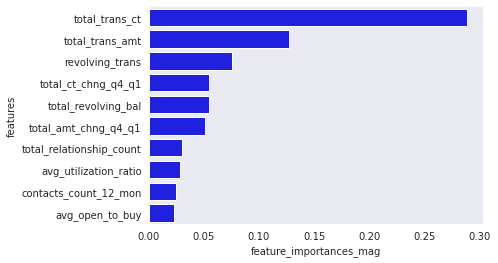

In [54]:
sns.barplot(y="features", x='feature_importances_mag', color = "blue",
            data=feat_imp[:10], orient='h', dodge=False);

#### Holdout test data results

In [55]:
pred_test = model.predict(x_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1701
           1       0.67      0.97      0.79       325

    accuracy                           0.92      2026
   macro avg       0.83      0.94      0.87      2026
weighted avg       0.94      0.92      0.92      2026



<AxesSubplot:>

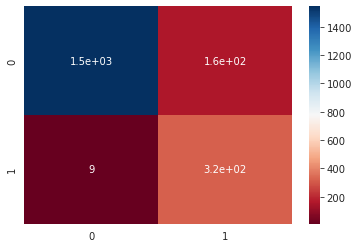

In [56]:
conf = confusion_matrix(y_test, pred_test)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [57]:
test["prediction"] = pred_test
test_probs = model.predict_proba(x_test)
test["prob_0"], test["prob_1"] = test_probs[:,0], test_probs[:,1]
test.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education,prediction,prob_0,prob_1
3933,815240358,0,47,F,3,Uneducated,Married,Unknown,Blue,42,...,1.063,3357,62,0.771,0.060,0.447125,Married_Uneducated,0,0.979951,0.020049
2790,779284833,0,55,M,2,Post-Graduate,Single,$60K - $80K,Blue,37,...,0.758,3591,63,0.750,0.081,0.500975,Single_Post-Graduate,0,0.959976,0.040024
8663,719658858,0,50,F,4,Doctorate,Married,Unknown,Silver,36,...,0.666,7042,73,0.553,0.061,0.297643,Married_Doctorate,0,0.880599,0.119401
731,719459358,0,52,M,1,Doctorate,Married,$120K +,Blue,41,...,1.219,1751,48,0.920,0.029,0.564820,Married_Doctorate,0,0.513143,0.486857
3335,734924658,0,47,F,5,High School,Married,Less than $40K,Blue,36,...,0.873,4123,67,0.489,0.536,0.192093,Married_High School,0,0.965643,0.034357


In [58]:
pred_score = test["prob_1"]

#### Precision - Recall Curve

In [59]:
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_score)

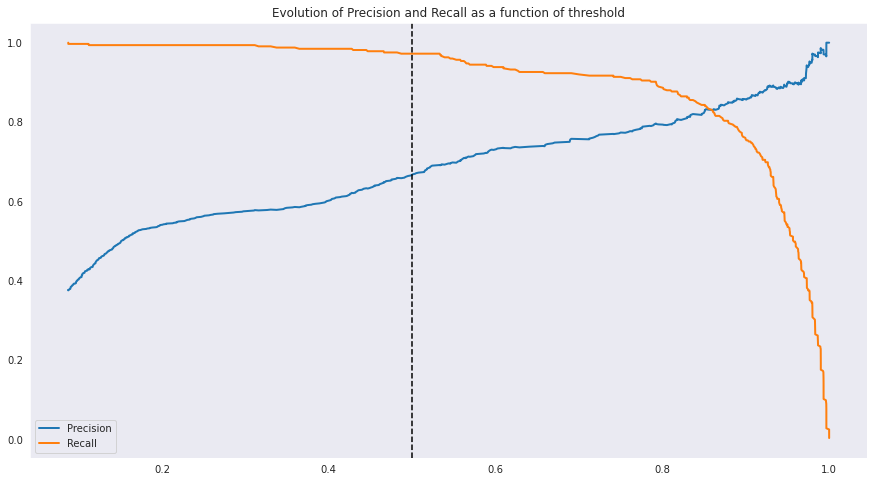

In [60]:
plt.figure(figsize = (15,8))
sns.lineplot(x = thresholds, y = precisions[:-1], markers = "b--", label="Precision", linewidth=2)
sns.lineplot(x = thresholds, y = recalls[:-1], markers = "g-", label="Recall", linewidth=2)
plt.axvline(x = [0.5], color = "black", linestyle = "dashed")
plt.title("Evolution of Precision and Recall as a function of threshold")
plt.show()

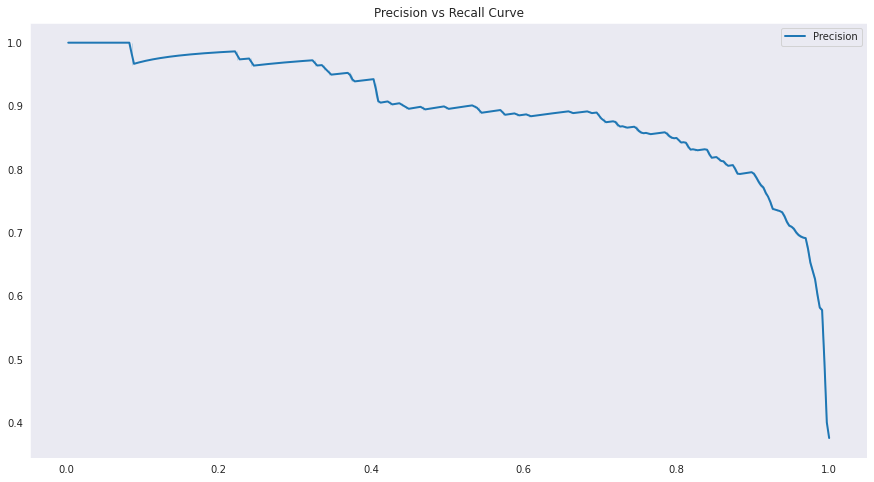

In [61]:
plt.figure(figsize = (15,8))
sns.lineplot(x = recalls[:-1], y = precisions[:-1], markers = "b--", label="Precision", linewidth=2)
plt.title("Precision vs Recall Curve")
#plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
[...]  # beautify the figure: add grid, legend, axis, labels, and circles
plt.show();

#### ROC Curve/ROC AUC Score

In [62]:
roc_auc_score(y_test, pred_score)

0.9807642563198118

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, pred_score)

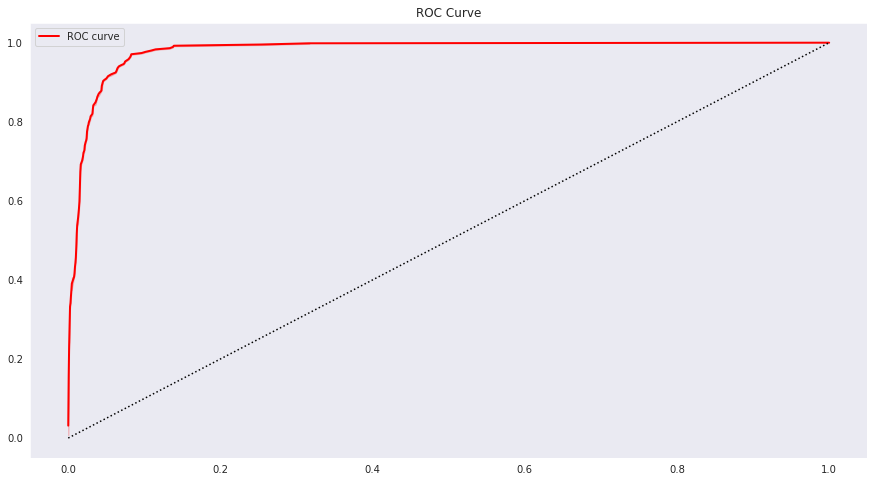

In [64]:
plt.figure(figsize = (15,8))
sns.lineplot(x = fpr, y = tpr, linewidth=2, label="ROC curve", color = "red")
plt.plot([0, 1], [0, 1], 'k:')
plt.title("ROC Curve")
plt.show()